# COVID DATA ANALYSIS

## TEAM 1: IGUANODON

## MEMBERS

- Ranjani Anjur Venkatraman(PM)
- Sharon Colson
- Cody Gardner

## INTRODUCTION

Analyzing recent covid data for multiple countries across the world

## DATA

We retrieved the covid data from below three API's:

#### - Historical API : 
Using Historical API retrieved 30 days data of Cases, Deaths, and Recovered for mutiple countries across world

Link : https://disease.sh/v3/covid-19/historical/

#### - Vaccination API :
Using Vaccination API retrieved vaccination information for mutiple countries across world

Link : https://disease.sh/v3/covid-19/vaccine/coverage/countries?lastdays=1

#### - Daily data API : 
Using Daily data API retrieved present day covid information

Link : https://disease.sh/v3/covid-19/countries/

## CODING

In [1]:
# Import Statements

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime, date


## DATA RETRIEVAL, MANIPULATION AND CLEANING

In [2]:
# Retrieving historical vaccination data for multiple countries

vaccination = requests.get("https://disease.sh/v3/covid-19/vaccine/coverage/countries?lastdays=30").json()


In [3]:
vaccine_days = []

vaccine_keys = vaccination[0]["timeline"].keys()

for value in vaccine_keys:
    vaccine_days.append(value)



In [4]:
country = []
vaccine =[]
v_date = []
for i in range(len(vaccination)): 
       
    
    for j in vaccine_days:
        
        try:
             
            vaccine.append(vaccination[i]["timeline"][j])
            country.append(vaccination[i]["country"])
            v_date.append(j)
        except:
            pass



In [5]:
# Historical vaccination dataframe

world_vaccination_df = pd.DataFrame({
                                "Country" : country,
                                "Date" : v_date,
                                "Vaccination_count" : vaccine
    
})

world_vaccination_df.head(2)

,Country,Date,Vaccination_count
0,Afghanistan,7/5/21,915671
1,Afghanistan,7/6/21,923566


In [6]:
# Retrieving historical Cases, Deaths and Recoverd data for multiple countries

world_data = requests.get("https://disease.sh/v3/covid-19/historical/").json()


In [7]:
world_days = []

world_keys = world_data[0]["timeline"]['cases'].keys()

for value in world_keys:
    world_days.append(value)

#world_days

In [8]:
country = []
cases =[]
deaths = []
recovered = []
w_date = []
for i in range(len(world_data)): 
       
    
    for j in world_days:
        
        try:
             
            cases.append(world_data[i]['timeline']['cases'][j])
            deaths.append(world_data[i]['timeline']['deaths'][j])
            recovered.append(world_data[i]['timeline']['recovered'][j])
            country.append(world_data[i]["country"])
            w_date.append(j)
        except:
            pass



In [9]:
# Historical world covid dataframe

world_covid_df = pd.DataFrame({
                              
                            
                                "Country" : country,
                                "Date" : w_date,
                                "Cases" : cases,
                                "Deaths" : deaths,
                                "Recovered" : recovered
                                
    
})

world_covid_df.head(5)

,Country,Date,Cases,Deaths,Recovered
0,Afghanistan,7/4/21,120216,4962,74480
1,Afghanistan,7/5/21,125937,5283,75314
2,Afghanistan,7/6/21,127464,5360,76218
3,Afghanistan,7/7/21,129021,5415,77280
4,Afghanistan,7/8/21,130113,5477,78521


In [10]:
# Merging historical world data with vaccination data. 
covid_df = pd.merge(world_covid_df,world_vaccination_df)
covid_df.head(3)



,Country,Date,Cases,Deaths,Recovered,Vaccination_count
0,Afghanistan,7/5/21,125937,5283,75314,915671
1,Afghanistan,7/6/21,127464,5360,76218,923566
2,Afghanistan,7/7/21,129021,5415,77280,934463


In [11]:
# Removing the duplicate values for certain countries

covid_df = covid_df.sort_values(['Country','Date','Cases']).drop_duplicates(subset=["Country","Date"],keep="last")


covid_df.head(5)

,Country,Date,Cases,Deaths,Recovered,Vaccination_count
5,Afghanistan,7/10/21,131586,5561,80226,955848
6,Afghanistan,7/11/21,131586,5561,81077,962093
7,Afghanistan,7/12/21,134653,5791,82586,971681
8,Afghanistan,7/13/21,134653,5791,82586,982882
9,Afghanistan,7/14/21,136643,5923,82586,1024168


In [12]:
# Sorting the data frame

covid_df['Date']=pd.to_datetime(covid_df.Date)
covid_df=covid_df.sort_values(['Country','Date'])
covid_df.head(5)

,Country,Date,Cases,Deaths,Recovered,Vaccination_count
0,Afghanistan,2021-07-05,125937,5283,75314,915671
1,Afghanistan,2021-07-06,127464,5360,76218,923566
2,Afghanistan,2021-07-07,129021,5415,77280,934463
3,Afghanistan,2021-07-08,130113,5477,78521,941428
4,Afghanistan,2021-07-09,131586,5561,79446,948556


## COVID DATA

In [13]:
#Covid data frame containing historical data of cases, deaths, recoverd and vaccination information for mltiple countries

covid_df.head(5)

,Country,Date,Cases,Deaths,Recovered,Vaccination_count
0,Afghanistan,2021-07-05,125937,5283,75314,915671
1,Afghanistan,2021-07-06,127464,5360,76218,923566
2,Afghanistan,2021-07-07,129021,5415,77280,934463
3,Afghanistan,2021-07-08,130113,5477,78521,941428
4,Afghanistan,2021-07-09,131586,5561,79446,948556


## GROUP BY

In [14]:
# Group by based on country
covid_groupby = covid_df.groupby('Country').median().reset_index()
covid_groupby.head(10)

,Country,Cases,Deaths,Recovered,Vaccination_count
0,Afghanistan,141489,6213,82586,1112010
1,Albania,132697,2456,130081,1076031
2,Algeria,154486,3956,106337,3160604
3,Andorra,14359,127,13897,82349
4,Angola,40906,969,34790,1592537
5,Antigua and Barbuda,1275,42,1225,66223
6,Argentina,4769142,101955,4407815,27430531
7,Armenia,227522,4569,218427,134331
8,Australia,20813,820,19898,10125533
9,Austria,653998,10729,639700,9096077


## VACCINATION DATA

In [15]:
# Pulling todays date
todays_date = str(date.today())
todays_date

'2021-08-03'

In [16]:
# Formatting todays date

todays_date = str(date.today())
clean_date = f"{todays_date[6:7]}/{todays_date[9:]}/{todays_date[2:4]}"
print(clean_date)




8/3/21


In [17]:
# Pulling the current day vaccination information for multiple countries


vaccination1 = requests.get("https://disease.sh/v3/covid-19/vaccine/coverage/countries?lastdays=1").json()
country = []
vc = []


for i in range(len(vaccination1)):
    c = vaccination1[i]['country']    
    vc.append(vaccination1[i]['timeline'][clean_date])   
    country.append(c)


len(vc)



213

In [18]:
# Vaccination information for each country
vaccine_count = pd.DataFrame({"Country" : country,
                               "Vaccination_count": vc  })

vaccine_count.head()

,Country,Vaccination_count
0,Afghanistan,1381416
1,Albania,1203087
2,Algeria,3421279
3,Andorra,82349
4,Angola,1592537


## PRESENT DAY COVID INFORMATION

In [19]:
country = []
vaccine1 =[]
v_date1 = []
for i in range(len(vaccination1)): 
       
    
    for j in vaccine_days:
        
        try:
             
            vaccine1.append(vaccination1[i]["timeline"][j])
            country.append(vaccination1[i]["country"])
            v_date1.append(j)
        except:
            pass

In [20]:
url= "https://disease.sh/v3/covid-19/countries/"



world_active =[]
activePerOneMillion = []
cases = []
casesPerOneMillion = []
continent = []
w_country = []
lat = []
long = []
critical = []
criticalPerOneMillion = []
deaths = []
deathsPerOneMillion = []
population = []
recovered=[]
recoveredPerOneMillion = []
tests = []
testsPerOneMillion = []
todayCases = []
todayDeaths = []
todayRecovered = []
for c in country:
    try:
        response = requests.get(url + c).json()
        world_active.append(response['active'])
        activePerOneMillion.append(response['activePerOneMillion'])
        cases.append(response['cases'])
        casesPerOneMillion.append(response['casesPerOneMillion'])
        continent.append(response['continent'])
        w_country.append(response['country'])
        lat.append(response['countryInfo']['lat'])
        long.append(response['countryInfo']['long'])
        critical.append(response['critical'])
        criticalPerOneMillion.append(response['criticalPerOneMillion'])
        deaths.append(response['deaths'])
        deathsPerOneMillion.append(response['deathsPerOneMillion'])
        population.append(response['population'])
        recovered.append(response['recovered'])
        recoveredPerOneMillion.append(response['recoveredPerOneMillion'])
        tests.append(response['tests'])
        testsPerOneMillion.append(response['testsPerOneMillion'])
        todayCases.append(response['todayCases'])
        todayDeaths.append(response['todayDeaths'])
        todayRecovered.append(response['todayRecovered'])
    except:
        pass
        #print(f'{c} does not have data')


In [21]:


daily_covid_df = pd.DataFrame({
                                "Active" : world_active,
                                #"ActivePerOneMillion" : activePerOneMillion,
                                "Total_cases" : cases,
                                #"Total_casesPerOneMillion" : casesPerOneMillion,
                                "Continent" : continent,                                
                                "Country" : w_country,
                                "Latitude" : lat,
                                "Longitude" : long,
                                "Critical" : critical,
                                #"CriticalPerOneMillion" : criticalPerOneMillion,
                                "Overall_deaths" : deaths,
                                #"Overall_deathsPerOneMillion" : deathsPerOneMillion,
                                "Population" : population,
                                "Recovered" : recovered,
                                #"RecoveredPerOneMillion" : recoveredPerOneMillion,
                                "Tests" : tests,
                                #"TestsPerOneMillion" : testsPerOneMillion,
                                "TodayCases" : todayCases,
                                "TodayDeaths" : todayDeaths,
                                "TodayRecovered" : todayRecovered,
                                
                                
})

daily_covid_df.head(5)

,Active,Total_cases,Continent,Country,Latitude,Longitude,Critical,Overall_deaths,Population,Recovered,Tests,TodayCases,TodayDeaths,TodayRecovered
0,41201,148933,Asia,Afghanistan,33.0,65.0,1124,6836,39876288,100896,715311,361,32,860
1,463,133211,Europe,Albania,41.0,20.0,3,2457,2874383,130291,916777,65,0,35
2,53302,175229,Africa,Algeria,28.0,3.0,29,4370,44708118,117557,230861,1307,41,787
3,290,14766,Europe,Andorra,42.5,1.6,0,128,77399,14348,193595,19,0,52
4,3592,42970,Africa,Angola,-12.5,18.5,8,1018,33969434,38360,681443,0,0,0


In [22]:
# Merging daily covid data with vaccination data
today_df = pd.merge(daily_covid_df,vaccine_count)

today_df.head(2)

,Active,Total_cases,Continent,Country,Latitude,Longitude,Critical,Overall_deaths,Population,Recovered,Tests,TodayCases,TodayDeaths,TodayRecovered,Vaccination_count
0,41201,148933,Asia,Afghanistan,33.0,65.0,1124,6836,39876288,100896,715311,361,32,860,1381416
1,463,133211,Europe,Albania,41.0,20.0,3,2457,2874383,130291,916777,65,0,35,1203087


In [23]:
# Creating subset with required columns
subset_today = today_df[['Country','Latitude','Longitude','Population','Continent']]
subset_today.head()

,Country,Latitude,Longitude,Population,Continent
0,Afghanistan,33.0,65.0,39876288,Asia
1,Albania,41.0,20.0,2874383,Europe
2,Algeria,28.0,3.0,44708118,Africa
3,Andorra,42.5,1.6,77399,Europe
4,Angola,-12.5,18.5,33969434,Africa


## MAIN COVID DATAFRAME

In [24]:
#Merging covid groupby data with subset data to have all the required columns for analysis

main_covid_df = pd.merge(covid_groupby,subset_today)

# unvaccinated = population - vaccinated
main_covid_df['Unvaccination_count'] = main_covid_df['Population']- main_covid_df['Vaccination_count']
main_covid_df.head()

,Country,Cases,Deaths,Recovered,Vaccination_count,Latitude,Longitude,Population,Continent,Unvaccination_count
0,Afghanistan,141489,6213,82586,1112010,33.0,65.0,39876288,Asia,38764278
1,Albania,132697,2456,130081,1076031,41.0,20.0,2874383,Europe,1798352
2,Algeria,154486,3956,106337,3160604,28.0,3.0,44708118,Africa,41547514
3,Andorra,14359,127,13897,82349,42.5,1.6,77399,Europe,-4950
4,Angola,40906,969,34790,1592537,-12.5,18.5,33969434,Africa,32376897


In [25]:
main_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              181 non-null    object 
 1   Cases                181 non-null    int64  
 2   Deaths               181 non-null    int64  
 3   Recovered            181 non-null    int64  
 4   Vaccination_count    181 non-null    int64  
 5   Latitude             181 non-null    float64
 6   Longitude            181 non-null    float64
 7   Population           181 non-null    int64  
 8   Continent            181 non-null    object 
 9   Unvaccination_count  181 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 15.6+ KB


# VISUALIZATIONS

## 1- TOP 10 VACCINATED COUNTRIES

In [26]:

most_vaccinated_df = main_covid_df.sort_values(['Vaccination_count'], ascending = False).head(10)
most_vaccinated_df['Rank'] = range(1,11,1)
most_vaccinated_df[['Rank','Country','Latitude','Longitude']]

,Rank,Country,Latitude,Longitude
34,1,China,35.0000,105.0000
73,2,India,20.0000,77.0000
170,3,USA,38.0000,-97.0000
23,4,Brazil,-10.0000,-55.0000
61,5,Germany,51.0000,9.0000
169,6,UK,54.0000,-2.0000
81,7,Japan,36.0000,138.0000
57,8,France,46.0000,2.0000
167,9,Turkey,39.0000,35.0000
79,10,Italy,42.8333,12.8333


In [27]:
# Dependencies
import gmaps
from config import gkey
# Google developer API key
gmaps.configure(api_key=gkey)
# Geocoordinates
loc = most_vaccinated_df[["Latitude", "Longitude"]]
Vaccination_count = most_vaccinated_df['Vaccination_count']

In [28]:
# Plotting heatmap based on vaccination and adding marker layer on top of the plot

fig = gmaps.figure(center=(45.0, -5.0), zoom_level=2)
heat = gmaps.heatmap_layer(loc, weights = Vaccination_count, dissipating=False, point_radius=8)
fig.add_layer(heat)


info_box_template = """
<dl>

<dt>Rank</dt><dd>{Rank}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
Vaccine_info = [info_box_template.format(**row) for index, row in most_vaccinated_df.iterrows()]
locations = most_vaccinated_df[["Latitude", "Longitude"]]

marker = gmaps.marker_layer(locations, info_box_content = Vaccine_info)
fig.add_layer(marker)

fig


Figure(layout=FigureLayout(height='420px'))

#### Inference:

Top three vaccinated countries are China, India and USA respectively. 

## 2-TOP 10 UNVACCINATED COUNTRIES BASED ON POPULATION

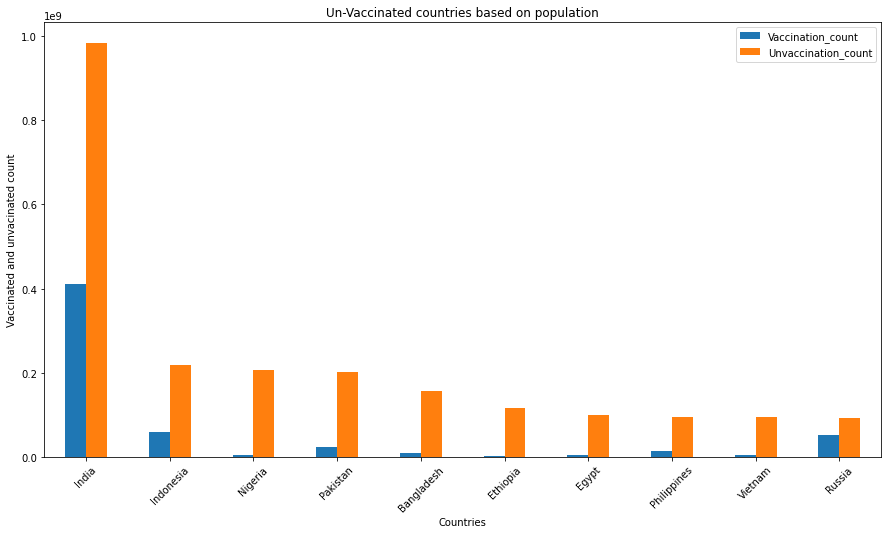

<Figure size 432x288 with 0 Axes>

In [29]:
Vaccinated_and_unvaccinated = main_covid_df[['Country',"Vaccination_count","Unvaccination_count"]].sort_values(['Unvaccination_count'], ascending = False).head(10)
multi_plot = Vaccinated_and_unvaccinated.plot(kind="bar", figsize=(15,8))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(Vaccinated_and_unvaccinated["Country"], rotation=45)
# Formatting the plot
plt.title("Un-Vaccinated countries based on population")
plt.xlabel("Countries")
plt.ylabel("Vaccinated and unvacinated count")
plt.show()
plt.tight_layout()



#### Inference:

Eventhough India is among the top 3 vaccinated countries, but with respect to population still there are more people who needs to be vaccinated.

## 3-TOP 10 COUNTRIES WITH HIGHEST COVID CASES

In [30]:
most_dailycases_df = main_covid_df.sort_values(['Cases'], ascending = False).head(10)
most_dailycases_df['Rank'] = range(1,11,1)
most_dailycases_df[['Rank','Country','Latitude','Longitude']]

,Rank,Country,Latitude,Longitude
170,1,USA,38.0000,-97.0000
73,2,India,20.0000,77.0000
23,3,Brazil,-10.0000,-55.0000
131,4,Russia,60.0000,100.0000
57,5,France,46.0000,2.0000
167,6,Turkey,39.0000,35.0000
169,7,UK,54.0000,-2.0000
6,8,Argentina,-34.0000,-64.0000
35,9,Colombia,4.0000,-72.0000
79,10,Italy,42.8333,12.8333


In [31]:

loc = most_dailycases_df[["Latitude", "Longitude"]]
Daily_New_case = most_dailycases_df['Cases']

In [32]:
fig = gmaps.figure(center=(45.0, -5.0), zoom_level=2)
heat = gmaps.heatmap_layer(loc, weights = Daily_New_case, dissipating=False, point_radius=8)
fig.add_layer(heat)

info_box_template = """
<dl>

<dt>Rank</dt><dd>{Rank}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
cases_info = [info_box_template.format(**row) for index, row in most_dailycases_df.iterrows()]
locations = most_dailycases_df[["Latitude", "Longitude"]]

marker = gmaps.marker_layer(locations, info_box_content = cases_info)
fig.add_layer(marker)

fig



Figure(layout=FigureLayout(height='420px'))

#### Inference:
Current top three countries affected by highest covid cases are USA, India and Brazil respectively.

## 4-CASES AND RECOVERED STACK PLOT BY REGION

In [33]:
region = main_covid_df.groupby("Continent").sum().reset_index()
region.head(2)

,Continent,Cases,Deaths,Recovered,Vaccination_count,Latitude,Longitude,Population,Unvaccination_count
0,Africa,6254015,158627,5423218,62400333,152.0603,836.8736,1296038236,1233637903
1,Asia,58696833,840426,55133052,2320288907,1152.7375,3418.3248,4578016243,2257727336


In [34]:
region_df = region[['Continent','Cases','Deaths','Recovered','Vaccination_count','Population']]
region_df

,Continent,Cases,Deaths,Recovered,Vaccination_count,Population
0,Africa,6254015,158627,5423218,62400333,1296038236
1,Asia,58696833,840426,55133052,2320288907,4578016243
2,Australia-Oceania,59427,1147,43705,12299206,42076450
3,Europe,49865619,1119035,27331480,599144484,747776104
4,North America,39650705,895860,3945125,469708307,592667384
5,South America,34616050,1055426,31676233,235134103,434303246


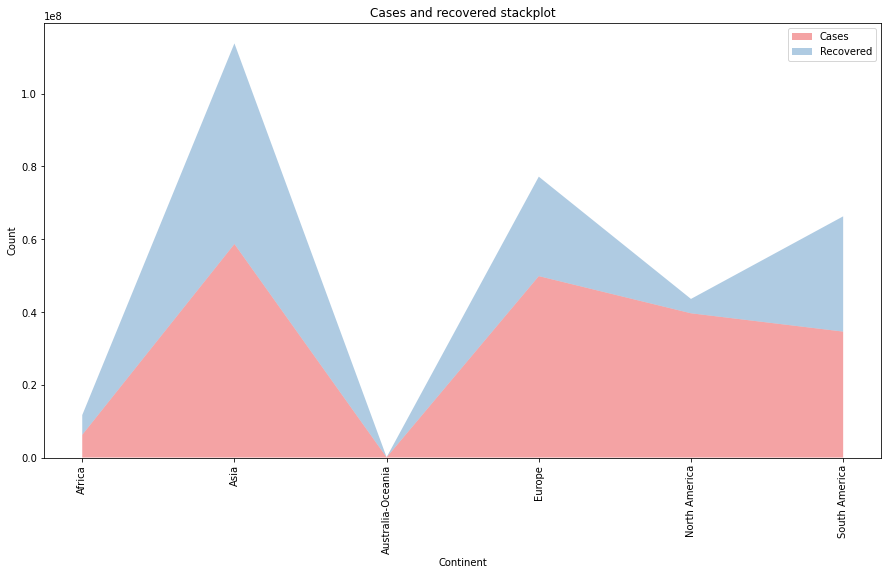

In [35]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,8))
pal = sns.color_palette("Set1")
plt.stackplot(region_df['Continent'],region_df["Cases"], region_df["Recovered"], labels=['Cases','Recovered'],colors=pal, alpha=0.4)
plt.legend(loc='upper right')
plt.title("Cases and recovered stackplot")
plt.xlabel("Continent")
plt.ylabel("Count")
plt.xticks(rotation=90)
#plt.figure(figsize=(15, 10))

plt.show()

#### Inference:
Above plot shows us that recovery rate is also higher compared to covid cases across continent

## 5-OVERALL SUMMARY BY REGION

Text(0, 0.5, 'Count')

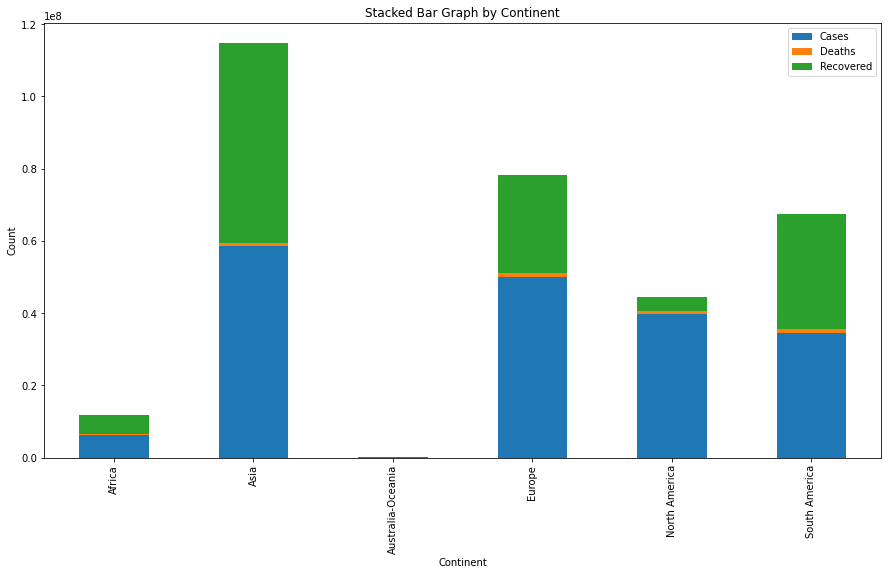

In [36]:

CCR = region[['Continent','Cases','Deaths','Recovered']]
CCR.plot(x='Continent', kind='bar', stacked=True,
        title='Stacked Bar Graph by Continent', figsize=(15, 8))

plt.ylabel("Count")

#### Inference:
From the above plot we can infer that Asia was badly affected by covid by also recovered more. 
Australia-Ocenia is least affected by covid cases compared to other continents

## 6-CORRELATION MATRIX

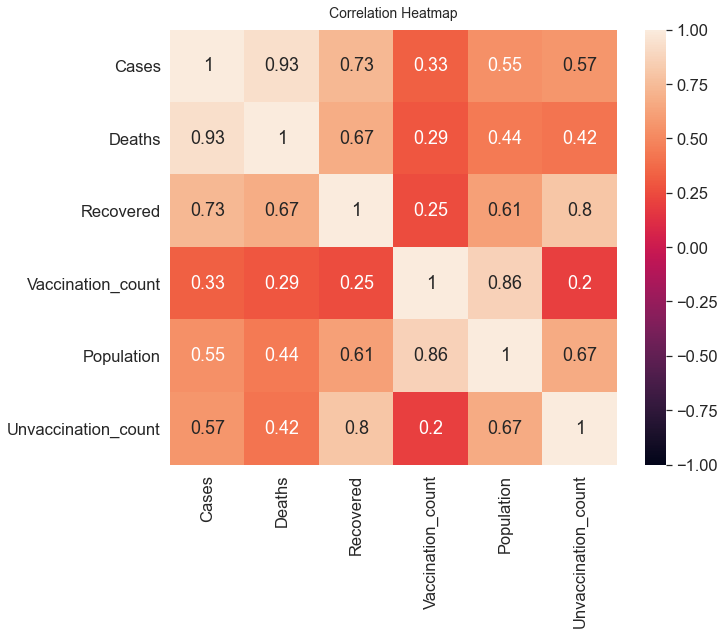

In [52]:
#plotting heat map to find the correlation between mutiple columns
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(main_covid_df[['Cases','Deaths','Recovered','Vaccination_count','Population','Unvaccination_count']].corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

#### Inference:
From the above matrix we can see that there is a highest correlation between cases and deaths. High correlation have lighter color and value closer to 1. Least correlation have darker color in the matrix.

## 7-TOP 10 COUNTRIES WITH HIGHEST DEATH COUNT

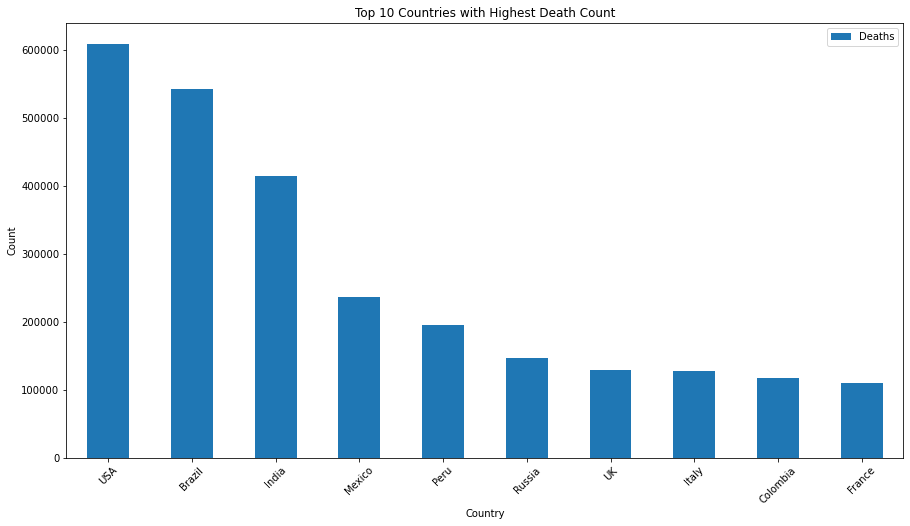

<Figure size 432x288 with 0 Axes>

In [38]:
Covid_Deaths_Country = main_covid_df[['Country',"Deaths"]].sort_values(['Deaths'], ascending = False).head(10)
multi_plot = Covid_Deaths_Country.plot(kind="bar", figsize=(15,8))

multi_plot.set_xticklabels(Covid_Deaths_Country["Country"], rotation=45)
plt.title("Top 10 Countries with Highest Death Count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()
plt.tight_layout()

#### Inference:
Current top three countries affected by highest covid deaths are USA, Brazil and India respectively.

## LINEAR REGRESSION

The p-value for cases and vaccination is 4.9763435009705676e-06


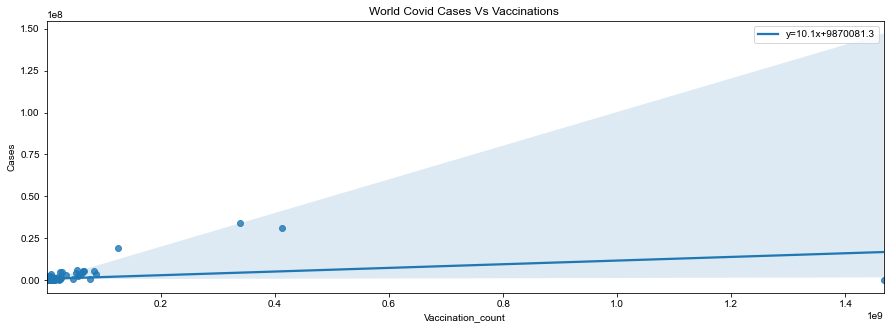

In [39]:
import seaborn as sns

import scipy.stats as st
from scipy.stats import linregress

fig, ax = plt.subplots(figsize=(15,5))


# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = st.linregress(main_covid_df['Cases'],
                                                            main_covid_df['Vaccination_count'])

p=sns.regplot(data=main_covid_df,
               x='Vaccination_count',
               y='Cases',
               line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}
).set(title='World Covid Cases Vs Vaccinations ')
    
# plot legend
ax.legend()
leg=ax.get_legend()
L_labels=leg.get_texts()
                                  
sns.set_style(style="white")
sns.set(font_scale = 1.5)
locs, labels = plt.xticks()

print(f'The p-value for cases and vaccination is {p_value}')
plt.show()

#### Inference:

Based on recent data we see positive correlation between cases and vaccination count. Currently due to increase in delta variant we see that even though when people are vaccinated there is still increase in cases around the world

## PEARSON'S CORRELATION COEFFICIENT

### Hypothesis

#### - H0: Cases and Vaccination are independent
#### - H1: There is a dependency between Cases and Vaccination

In [40]:
import scipy.stats as st
from scipy.stats import linregress

correlation=round(st.pearsonr(main_covid_df['Vaccination_count'],main_covid_df['Cases'])[0],2)
p_value = st.pearsonr(main_covid_df['Vaccination_count'],main_covid_df['Cases'])[1]
print(f"The correlation between cases and vaccination is {correlation}")
print(f"The p-value for cases and vaccination is {p_value}")

The correlation between cases and vaccination is 0.33
The p-value for cases and vaccination is 4.976343500971269e-06


In [41]:
if p_value > 0.05:
	print('Probably cases and vaccination are not correlated')
else:
	print('Probably cases and vaccination have correlation')

Probably cases and vaccination have correlation


#### Inference:

Since p-value is less than 0.05 we can reject null hypothesis and accept the alternate hypothesis that there is a dependency between cases and vaccination

## TREND OF COVID CASES ACROSS WORLD

In [42]:
cases_by_date_top_countries = (covid_df
                           .filter(['Date','Country','Cases'])
                           .query('Country in ["USA","India","UK"]')
                           .groupby(['Date','Country'])
                           .agg('sum')
                           .reset_index()
                           )

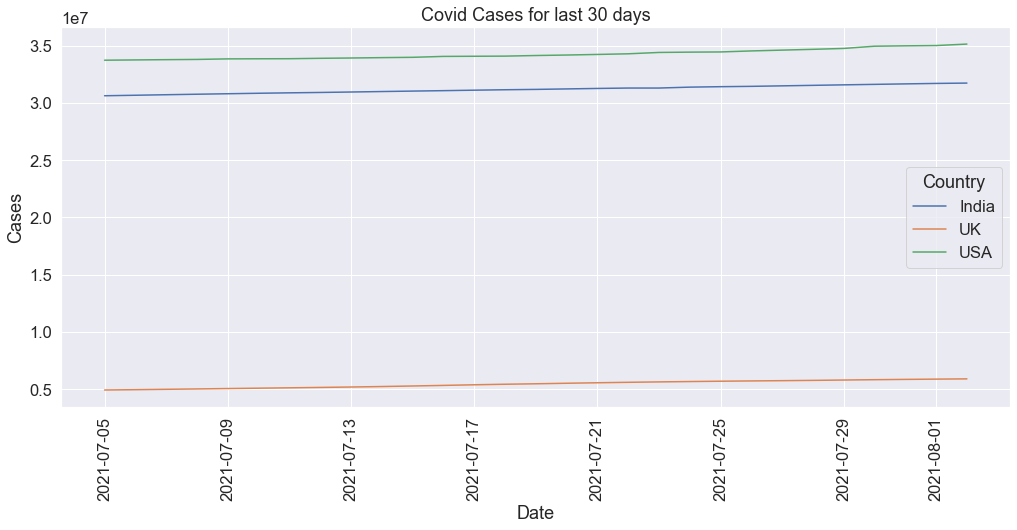

In [43]:
fig, ax = plt.subplots(figsize=(17,7))
sns.lineplot(data = cases_by_date_top_countries
             ,x = 'Date'
             ,y = 'Cases'
             ,hue = 'Country'
             ,legend=True
             ,ax=ax
             ).set(title='Covid Cases for last 30 days')
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

#### Inference:

From the above plot we can see that for past 30 days there is a steady increase in cases for all the countries taken into consideration

## AUGMENTED DICKEY FULLER TEST

#### - Tests whether a time series has a unit root






## Hypothesis

#### -  H0: a unit root is present (series is non-stationary).
#### -  H1: a unit root is not present (series is stationary).

In [44]:
from statsmodels.tsa.stattools import adfuller
import numpy 
usa = covid_df.loc[covid_df['Country'] == 'USA']


In [45]:
us_dc = []


for i in range(1,len(usa)):
    diff = usa.iloc[i]['Cases'] -  usa.iloc[i-1]['Cases']
    us_dc.append(diff)
len(us_dc) 

28

In [46]:
usa_t = numpy.asarray(us_dc)

In [47]:

usa_t

array([ 24224,  22931,  20061,  48241,   9038,   6164,  35013,  26424,
        31845,  28412,  79310,  12960,  12048,  52111,  42703,  52032,
        55077, 118797,  27395,  16008,  89096,  70740,  68771,  78170,
       194608,  32808,  25141, 127976], dtype=int64)

<Figure size 1080x576 with 0 Axes>

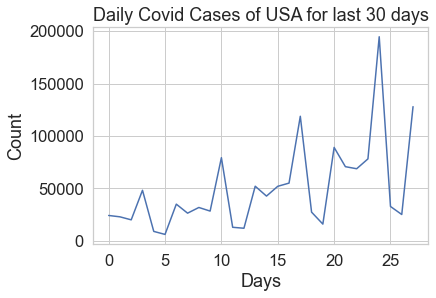

<Figure size 1080x576 with 0 Axes>

In [48]:
plt.plot(usa_t)
plt.title("Daily Covid Cases of USA for last 30 days")
plt.xlabel("Days")
plt.ylabel("Count")
plt.figure(figsize=(15, 8))


In [49]:
X = usa_t
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 3.133236
p-value: 1.000000
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651
Failed to Reject Ho - Time Series is Non-Stationary


#### Inference:

As p_value is greater than 0.05 and ADF statistic > greater than critical value we fail to reject null hypothesis.So the time series data is non stationary

## REFERENCES

#### Statistics:
 
 - https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
 - https://www.kaggle.com/hamelg/python-for-data-24-hypothesis-testing
 - https://regenerativetoday.com/a-complete-guide-to-hypothesis-testing-and-examples-in-python/

